# Impact du déficit dans la trajectoire du COR de Juin 2019

L'objectif de cet exemple est d'analyser la trajectoire du COR du rapport de Juin 2019 en termes de déficits. En effet, un déficit est présenté dont on peut se demander si il est significatif. C'est pourquoi nous comparons deux pilotages :
* le pilotage du COR de Juin 2019,
* un pilotage avec un solde financier nul, la trajectoire d'âge du COR et la trajectoire de pensions du COR.


## Pilotage du COR de Juin 2019

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
import pylab as pl

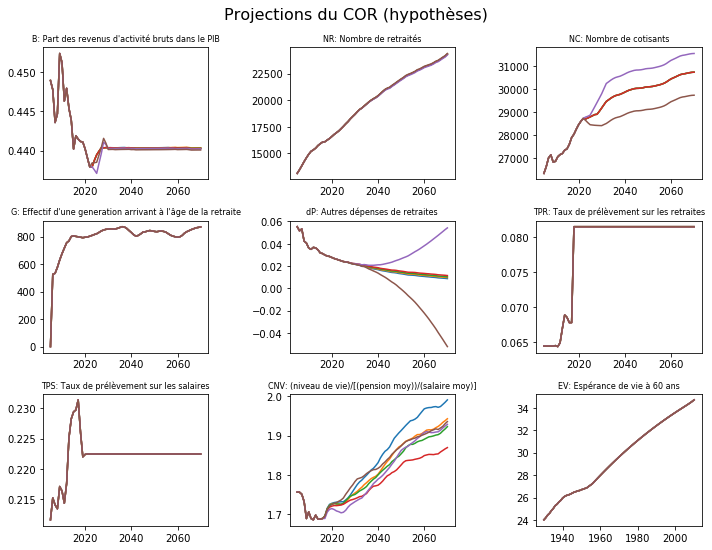

In [2]:
simulateur = SimulateurRetraites()
simulateur.dessineConjoncture();

In [3]:
analyse = simulateur.pilotageCOR()

## Pilotage 1 : le statu quo du COR

Cette stratégie de pilotage est celle du COR en 2019. 

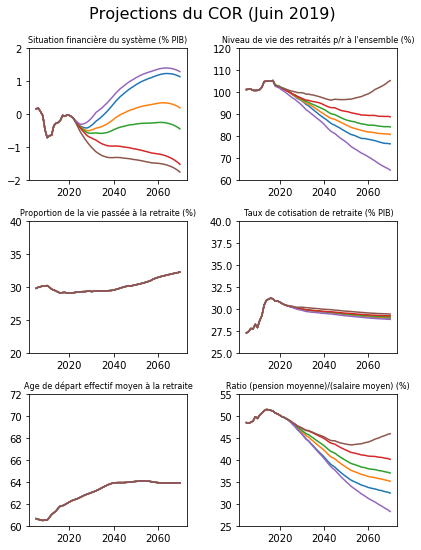

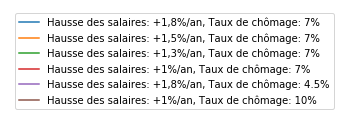

In [4]:
simulateur = SimulateurRetraites()

analyseCOR = simulateur.pilotageCOR()

pl.figure(figsize=(6, 8))
analyseCOR.dessineSimulation()
pl.suptitle("Projections du COR (Juin 2019)", fontsize=16)
analyseCOR.dessineLegende()

On observe que, quelque soit le scénario économique, le taux de cotisation de retraite baisse de 31 % environ en 2020 vers 30 % en 2070. 

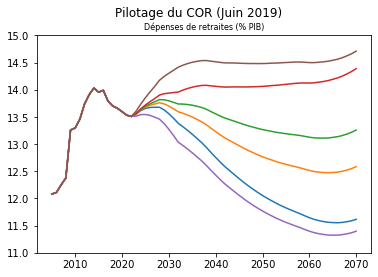

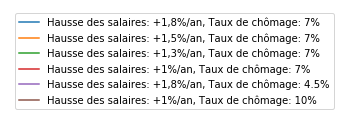

In [5]:
pl.suptitle("Pilotage du COR (Juin 2019)")
analyseCOR.dessineVariable("Depenses")
analyseCOR.dessineLegende()

On observe que le montant des dépenses de retraites peut augmenter ou décroître en fonction du scénario économique.

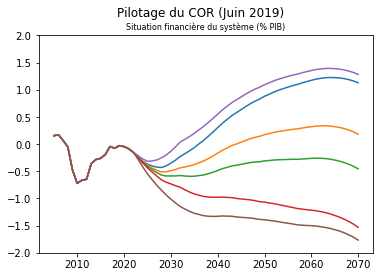

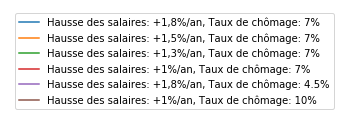

In [6]:
pl.suptitle("Pilotage du COR (Juin 2019)")
analyseCOR.dessineVariable("S")
analyseCOR.dessineLegende()

On observe un solde financier qui peut être positif (excédent) par exemple si la situation économique est favorable (hausse des salaires +1.8%/an et taux de chômage à 4.5%) ou négatif (déficit) par exemple si la situation économique est défavorable (hausse des salaires +1%/an et taux de chômage à 10%).

## Calcul à solde financier nul, pensions du COR et âge du COR

Cette stratégie de pilotage impose :
* l'équilibre financier,
* le maintien du niveau des pensions par rapport aux salaires,
* l'âge de départ.

On utilise la trajectoire d'âge et la trajectoire de pensions du COR.

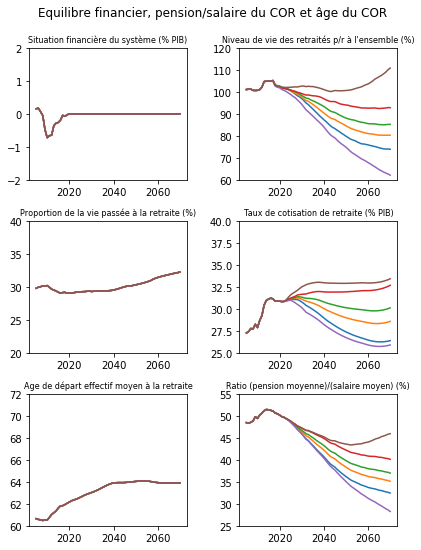

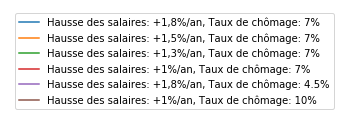

In [7]:
simulateur = SimulateurRetraites()
pl.figure(figsize=(6, 8))
pl.suptitle(
    "Equilibre financier, pension/salaire du COR et âge du COR", fontsize=12
)
analyseSoldeNul = simulateur.pilotageParSoldePensionAge(Scible=0.0)
analyseSoldeNul.dessineSimulation()
analyseSoldeNul.dessineLegende()

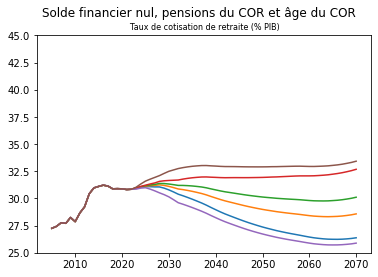

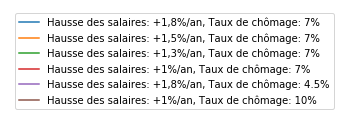

In [8]:
analyseSoldeNul.dessineVariable("T")
pl.suptitle("Solde financier nul, pensions du COR et âge du COR")
pl.ylim(bottom=25.0, top=45.0)
analyseSoldeNul.dessineLegende()

On observe que la trajectoire du taux de cotisations est différente de celle du COR : au lieu de de baisser en dessous de 30 % comme dans les six trajectoires du COR de Juin 2019, le taux de cotisations peut augmenter légèrement vers 32 % en 2070 en cas de scénario économique défavorable ou baisser vers 26 % en 2070 en cas de scénario économique favorable. Résorber un éventuel déficit ou bénéficier de ressources supplémentaire ne pose donc pas de problème particulier avec ce pilotage. 

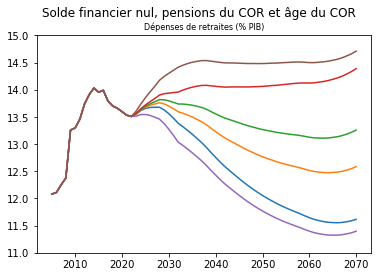

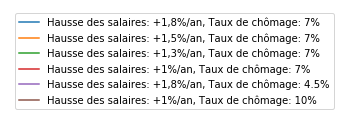

In [9]:
analyseSoldeNul.dessineVariable("Depenses")
pl.suptitle("Solde financier nul, pensions du COR et âge du COR")
analyseSoldeNul.dessineLegende()

Les trajectoires de dépenses sont strictement identiques aux trajectoires du COR de Juin 2019. En effet, nous avons conservé le même niveau de pensions que dans les projections du COR. 

## Comparaison des taux de cotisations

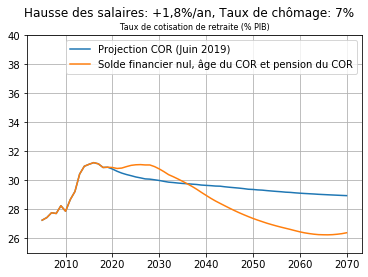

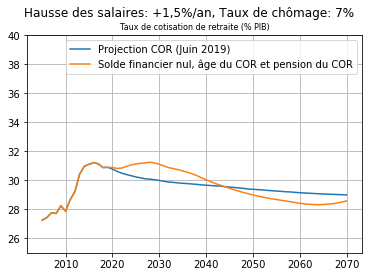

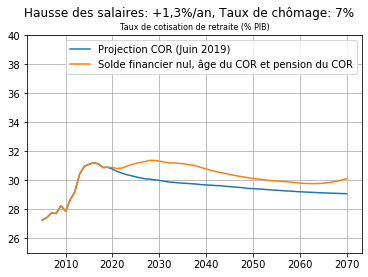

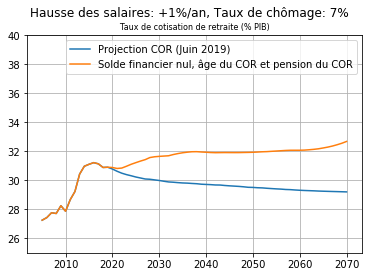

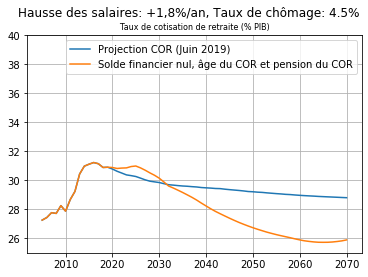

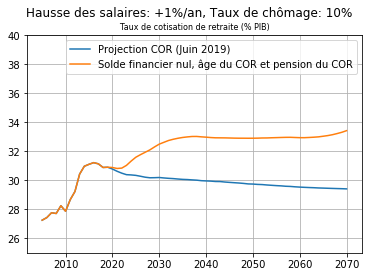

In [11]:
for scenario in simulateur.scenarios:
    pl.figure()
    pl.suptitle(simulateur.scenarios_labels[scenario - 1])
    analyseCOR.dessineVariable("T", scenarios_indices=[scenario])
    analyseSoldeNul.dessineVariable("T", scenarios_indices=[scenario])
    pl.legend(
        [
            "Projection COR (Juin 2019)",
            "Solde financier nul, âge du COR et pension du COR",
        ]
    )
    pl.grid();

On observe que le fait d'imposer le solde nul peut générer une baisse du taux de cotisation de 4 points de PIB en cas de scénario favorable ou une hausse du taux de cotisation d'ampleur similaire en cas de scénario défavorable.

## Conclusion

Nous avons vu que le solde financier présenté dans le rapport du COR de Juin 2019 peut se traduire par un excédent ou par un déficit. Annuler ce solde peut être réalisé en augmentant ou en diminuant le taux de cotisations avec une variation de plus ou moins 4 points de PIB environ.